# What's the data like?

In [92]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os, dotenv
project_path = os.path.dirname(dotenv.find_dotenv())

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
df = pd.read_csv(project_path + '/data/raw/data.csv', index_col=0)
df.head()

,index,volumefrom,open,high,close,low,volumeto,time
0,0,5308.04,6916.03,7032.79,7025.50,6890.13,3.709711e+07,1522486800
1,1,16533.51,7023.16,7198.68,7110.38,6984.43,1.176889e+08,1522490400
2,2,6133.92,7110.38,7144.87,7104.39,7062.55,4.372014e+07,1522494000
3,3,16748.27,7104.42,7228.40,7198.18,7067.62,1.199642e+08,1522497600
4,4,4564.56,7198.29,7198.80,7053.37,7051.17,3.259900e+07,1522501200


In [8]:
df.describe()

,index,volumefrom,open,high,close,low,volumeto,time
count,46023.000000,4.602300e+04,46023.000000,46023.000000,46023.000000,46023.000000,4.602300e+04,4.602300e+04
mean,1000.000000,3.225572e+03,1886.373203,1904.522454,1886.442461,1868.437188,8.656790e+06,1.446887e+09
std,577.645148,5.961332e+04,3272.862938,3299.083569,3273.005449,3244.198294,2.892422e+07,4.780517e+07
min,0.000000,0.000000e+00,50.350000,50.350000,48.250000,5.760000,0.000000e+00,1.364087e+09
25%,500.000000,1.825400e+02,276.280000,277.985000,276.310000,274.730000,9.559342e+04,1.405489e+09
50%,1000.000000,1.404710e+03,538.050000,544.220000,537.990000,532.320000,5.936102e+05,1.446887e+09
75%,1500.000000,3.029195e+03,1085.780000,1142.850000,1088.510000,1056.000000,3.272736e+06,1.488285e+09
max,2000.000000,8.410600e+06,19784.930000,19870.620000,19784.930000,19691.740000,2.305670e+09,1.529687e+09


In [27]:
df.dropna().shape == df.shape

True

In [84]:
sample = df.sample(n=1000)

In [ ]:
sns.boxplot(data=sample)

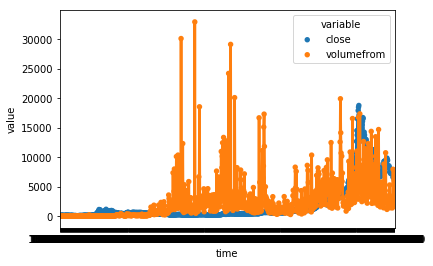

In [93]:
pltdata = pd.melt(sample, id_vars=['time'], value_vars=['close','volumefrom'])
fig, ax = plt.subplots()
sns.pointplot(data=pltdata, x='time', y='value', hue='variable', linestyles='-', markers='.')




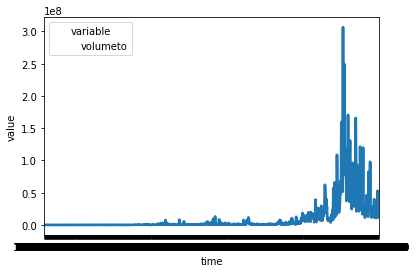

In [89]:
fig, ax = plt.subplots()
pltdata = pd.melt(sample, id_vars=['time'], value_vars=['volumeto'])
sns.pointplot(data=pltdata, x='time', y='value', hue='variable', linestyles='-', markers='')

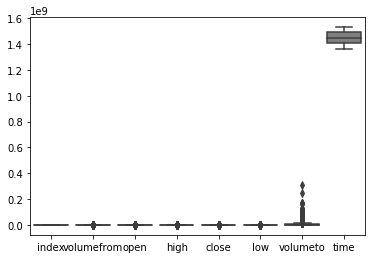